## 📊 Dataset (Same as before, extended with some made-up variables for practice)

```python
import pandas as pd

data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
              'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
              'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa'],
    'Region': ['South', 'West', 'West', 'South', 'West',
               'West', 'Northeast', 'South', 'South', 'South',
               'West', 'West', 'Midwest', 'Midwest', 'Midwest'],
    'Population': [4779736, 710231, 6392017, 2915918, 37253956,
                   5029196, 3574097, 897934, 18801310, 9687653,
                   1360301, 1567582, 12830632, 6483802, 3046355],
    'Murder.Rate': [5.7, 5.6, 4.7, 5.6, 4.4,
                    2.8, 2.4, 5.8, 5.2, 6.0,
                    1.8, 2.3, 5.5, 5.7, 1.9],
    'Unemployment.Rate': [6.8, 7.6, 8.3, 7.9, 9.0,
                          6.0, 5.1, 7.5, 10.2, 9.8,
                          4.7, 5.4, 8.8, 7.1, 4.3]
}

state = pd.DataFrame(data)
```

---

## 📘 Quiz: Correlation

### **Q1. Pearson Correlation**

Compute the **Pearson correlation coefficient** between:

* Population and Murder.Rate
* Unemployment.Rate and Murder.Rate

Interpret the direction and strength of each correlation.



### **Q2. Spearman Correlation**

Compute the **Spearman rank correlation** between:

* Population and Murder.Rate
* Unemployment.Rate and Murder.Rate

Explain the difference between Spearman and Pearson in your own words.



### **Q3. Scatter Plot (Conceptual)**

If a scatter plot shows a non-linear relationship between two variables, which correlation measure (Pearson or Spearman) is more appropriate, and why?



### **Q4. Correlation Matrix**

Compute the **correlation matrix** for the numeric variables: `Population`, `Murder.Rate`, and `Unemployment.Rate`. Show the matrix and identify the strongest and weakest pairwise relationships.



### **Q5. Correlation vs. Causation**

Give one real-world example where two variables may be **strongly correlated but not causally related**. Briefly explain what could be going on instead.



# Answers:

Import our data set:

In [1]:
import pandas as pd

data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
              'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
              'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa'],
    'Region': ['South', 'West', 'West', 'South', 'West',
               'West', 'Northeast', 'South', 'South', 'South',
               'West', 'West', 'Midwest', 'Midwest', 'Midwest'],
    'Population': [4779736, 710231, 6392017, 2915918, 37253956,
                   5029196, 3574097, 897934, 18801310, 9687653,
                   1360301, 1567582, 12830632, 6483802, 3046355],
    'Murder.Rate': [5.7, 5.6, 4.7, 5.6, 4.4,
                    2.8, 2.4, 5.8, 5.2, 6.0,
                    1.8, 2.3, 5.5, 5.7, 1.9],
    'Unemployment.Rate': [6.8, 7.6, 8.3, 7.9, 9.0,
                          6.0, 5.1, 7.5, 10.2, 9.8,
                          4.7, 5.4, 8.8, 7.1, 4.3]
}

state = pd.DataFrame(data)

View the data set

In [2]:
state

,State,Region,Population,Murder.Rate,Unemployment.Rate
0,Alabama,South,4779736,5.7,6.8
1,Alaska,West,710231,5.6,7.6
2,Arizona,West,6392017,4.7,8.3
3,Arkansas,South,2915918,5.6,7.9
4,California,West,37253956,4.4,9.0
5,Colorado,West,5029196,2.8,6.0
6,Connecticut,Northeast,3574097,2.4,5.1
7,Delaware,South,897934,5.8,7.5
8,Florida,South,18801310,5.2,10.2
9,Georgia,South,9687653,6.0,9.8


### **Q1. Pearson Correlation**

Compute the **Pearson correlation coefficient** between:

* Population and Murder.Rate
* Unemployment.Rate and Murder.Rate

Interpret the direction and strength of each correlation.


Formula:

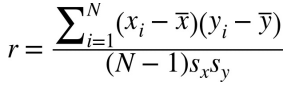

**a) Population and Murder.Rate:**

In [3]:
# Import libraries
import numpy as np
import scipy.stats

# get standard deviation of population (x) and murder rate (y)
std_pop = np.std(state['Population'])
std_murd = np.std(state['Murder.Rate'])

# get mean of population (x) and murder rate (y)
mean_pop = state['Population'].mean()
mean_murd = state['Murder.Rate'].mean()

# Get number of data points "n"
n = state.shape[0]

# Create empty variable to store sum of (xi - xm)(yi - ym)
sum_a = 0

# Loop through n data points and add them
for i in range(n):
    xi = state.iloc[i,2]
    yi = state.iloc[i,3]

    product = (xi - mean_pop) * (yi - mean_murd)  # This is the step of (xi - xm)(yi - ym)
    sum_a += product

# Now we can compute the correlation coefficient:
r_a = sum_a / ((n - 1) * std_pop * std_murd)

# print results
print(f"Manually calculated correlation between Population and Murder.Rate: {r_a}")
print(f"Automatically calculated correlation between Population and Murder.Rate: {scipy.stats.pearsonr(state['Population'], state['Murder.Rate'])}")

Manually calculated correlation between Population and Murder.Rate: 0.20666531229062368
Automatically calculated correlation between Population and Murder.Rate: PearsonRResult(statistic=np.float64(0.19288762480458213), pvalue=np.float64(0.49097886873981594))


**Observation:** It appears that there is a very slight positive correlation between population and murder rate (0.2) but it is not a large enough correlation to imply that a higher population would lead to a very high murder rate.

**b) Unemployment.Rate and Murder.Rate:**

In [4]:
# get standard deviation of the unemployment rate (y)
std_unemp = np.std(state['Unemployment.Rate'])

# get mean of the unemployment rate (y)
mean_unemp = state['Unemployment.Rate'].mean()

# Create empty variable to store sum of (xi - xm)(yi - ym)
sum_b = 0

# Loop through n data points and add them
for i in range(n):
    xi = state.iloc[i,3]
    yi = state.iloc[i,4]

    product = (xi - mean_murd) * (yi - mean_unemp)  # This is the step of (xi - xm)(yi - ym)
    sum_b += product

# Now we can compute the correlation coefficient:
r_b = sum_b / ((n - 1) * std_murd * std_unemp)

# print results
print(f"Manually calculated correlation between the Murder.Rate and the Unemployment.Rate: {r_b}")
print(f"Automatically calculated correlation between the Murder.Rate and the Unemployment.Rate: {scipy.stats.pearsonr(state['Murder.Rate'], state['Unemployment.Rate'])}")

Manually calculated correlation between the Murder.Rate and the Unemployment.Rate: 0.8584173217242379
Automatically calculated correlation between the Murder.Rate and the Unemployment.Rate: PearsonRResult(statistic=np.float64(0.8011895002759555), pvalue=np.float64(0.0003302670049237673))


**Observation:** It seems that the murder rate is positively correlated with the unemployment rate (0.8). This means that high unemployment may lead to higher rates of murder.

### **Q2. Spearman Correlation**

Compute the **Spearman rank correlation** between:

* Population and Murder.Rate
* Unemployment.Rate and Murder.Rate

Explain the difference between Spearman and Pearson in your own words.


In [5]:
# Print results
print(f"Automatically calculated correlation between Population and Murder.Rate: {scipy.stats.spearmanr(state['Population'], state['Murder.Rate'])}")
print(f"Automatically calculated correlation between the Murder.Rate and the Unemployment.Rate: {scipy.stats.spearmanr(state['Murder.Rate'], state['Unemployment.Rate'])}")

Automatically calculated correlation between Population and Murder.Rate: SignificanceResult(statistic=np.float64(0.1341683721065912), pvalue=np.float64(0.6335637188020524))
Automatically calculated correlation between the Murder.Rate and the Unemployment.Rate: SignificanceResult(statistic=np.float64(0.5724517209881224), pvalue=np.float64(0.025736469373542008))


**Difference between Spearman and Pearson:** Looking at the different results from using both, it seems that the Spearman rank correlation give a more **conservative** value. It appears to be more resilient to outliers.
 

### **Q3. Scatter Plot (Conceptual)**

If a scatter plot shows a non-linear relationship between two variables, which correlation measure (Pearson or Spearman) is more appropriate, and why?


**Answer:** The Spearman correlation is mainly used with variables that don't have a linear relationship (usually those that are **Monotonic** with each other). Usually with small population samples that would have a Pierson correlation that is all over the place.

This is because non-linear variables don't correlate in a straight line which the Pierson correlation measures specifically for. There may be points at which the line flattens out. 

### **Q4. Correlation Matrix**

Compute the **correlation matrix** for the numeric variables: `Population`, `Murder.Rate`, and `Unemployment.Rate`. Show the matrix and identify the strongest and weakest pairwise relationships.


In [13]:
correlation_matrix = state[['Population', 'Murder.Rate', 'Unemployment.Rate']].corr(method='pearson') # You can specify 'pearson' (default), 'kendall', or 'spearman'
correlation_matrix

,Population,Murder.Rate,Unemployment.Rate
Population,1.000000,0.192888,0.58366
Murder.Rate,0.192888,1.000000,0.80119
Unemployment.Rate,0.583660,0.801190,1.00000


**Observation:** The Murder and Unemployment rates have the **strongest** pairwise relationship while population and murder rate have the **weakest** pairwise relationship.

### **Q5. Correlation vs. Causation**

Give one real-world example where two variables may be **strongly correlated but not causally related**. Briefly explain what could be going on instead.


**Answer:** Ice-cream sales and shark attacks are correlated during the summer but they are not casually related. There is actually a confounding variable that causes both of them: an increasing water temperature. 

This happens when there is a third variable that influences both the dependent and independent variable making it look as if there is a direct causal relationship.